In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from pyfonts import load_font

## Get data

In [141]:
df = pd.read_csv("data//activities.csv")

In [142]:
df.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type',
       'Start Time', 'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1',
    

In [143]:
#dataset checks ----------------------
columns = df.columns
expected_columns = ['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'Distance.1', 'Moving Time']
missing_columns = []
flag = False

for column in expected_columns:
    if column not in columns:
        flag=True
        missing_columns.append(column)

if flag==True:
    print("Your dataset looks off")
    print("----")
    print("The dataset is missing the following columns: " + str(missing_columns))
    print("Check that the dataset matches the expected format outlined here")

In [144]:
#reduce to relevant columns
df = df[expected_columns].rename(columns={"Distance.1":"Distance"})

#convert date column into datetime
df["Activity Date"] = pd.to_datetime(df["Activity Date"])

## Analyse and prepare data

In [145]:
#inputs -----------------------

#set filter
year_filter = 2024

#set aggregation method
agg_method = "Counts"

#data prep -----------------------

#filter for 1 year
df_filtered = df[df["Activity Date"].dt.year == year_filter]

#get max top 3 activity types for aggregation method
if agg_method in ["Moving time", "Distance"]:
    top_three = df_filtered.groupby(["Activity Type"]
                                    )[agg_method].sum().sort_values(
                                    ascending=False).head(3).index.to_list()
else:
    top_three = df_filtered["Activity Type"].value_counts().head(3).index.to_list()

#derive clean column for activity types to use later
df_filtered["Activity Type clean"] = [activity if activity in top_three else "Other"
                                        for activity in df_filtered['Activity Type']]
df_filtered["Activity rank"] = df_filtered["Activity Type"].map(
    dict(zip(top_three, np.arange(0,len(top_three),1)))
    ).fillna(len(top_three)+1)

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_8960\2495044112.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Activity Type clean"] = [activity if activity in top_three else "Other"
C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_8960\2495044112.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Activity rank"] = df_filtered["Activity Type"].map(


In [146]:
#pre-aggregate data
pivot = df_filtered.groupby([df_filtered["Activity Date"].dt.month,
                             df_filtered["Activity Date"].dt.day]).agg({'Activity Type clean': ','.join})
pivot.index.names = ["Month", "Day"]
pivot = pivot.reset_index()
pivot["Activity Type clean"] = [i.split(",") for i in pivot["Activity Type clean"]]

In [152]:
#summary data for small multiples
months = np.arange(1,13,1)
time_values = []
distance_values = []
for month in months:
    time_values.append(df_filtered[(df_filtered["Activity Date"].dt.month == month)]["Moving Time"].sum())
    distance_values.append(df_filtered[(df_filtered["Activity Date"].dt.month == month)]["Distance"].sum()/1000)

In [150]:
df_filtered.groupby(df_filtered["Activity Date"].dt.month)["Distance"].sum()/1000

Activity Date
1      60.354540
2     148.092690
3     211.755810
4     182.043860
5     210.876168
6     130.003918
7     823.749696
8     204.663890
9      63.722710
10      4.500000
11     44.513400
12      5.000000
Name: Distance, dtype: float64

In [ ]:
import datetime 
datetime.datetime(1,1,1, hours, minutes, seconds)

<BarContainer object of 12 artists>

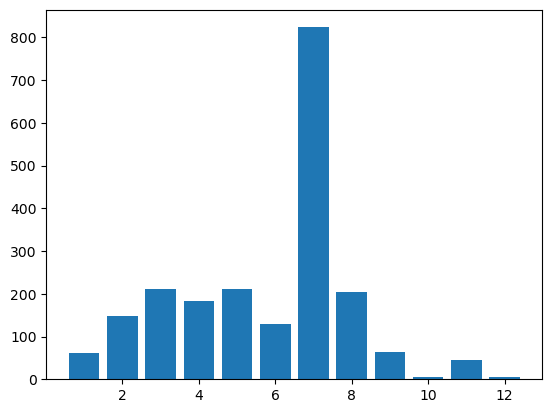

In [153]:
plt.bar(months, distance_values)

## Visualise

In [125]:
#config -----------------------

#create colour dict for activities
act_color = ["#6DB4C8", "#FD7B5C", "#F1C150", "#B8B8B8"]
act_colormap = dict(zip(top_three + ["Other"], act_color))

#colors
colors = {"bg": "#FBF9F5", "text":"#2E3234" }

#basesize of circles
markersize = 80

#axis labels
month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

#fonts
font_b = load_font(font_url='https://github.com/andrew-paglinawan/QuicksandFamily/blob/master/fonts/statics/Quicksand-Bold.ttf?raw=true')
font_r = load_font(font_url='https://github.com/andrew-paglinawan/QuicksandFamily/blob/master/fonts/statics/Quicksand-Regular.ttf?raw=true')
font_m = load_font(font_url='https://github.com/andrew-paglinawan/QuicksandFamily/blob/master/fonts/statics/Quicksand-Medium.ttf?raw=true')
font_handwritten = load_font(font_url='https://github.com/google/fonts/blob/main/apache/rocksalt/RockSalt-Regular.ttf?raw=true')

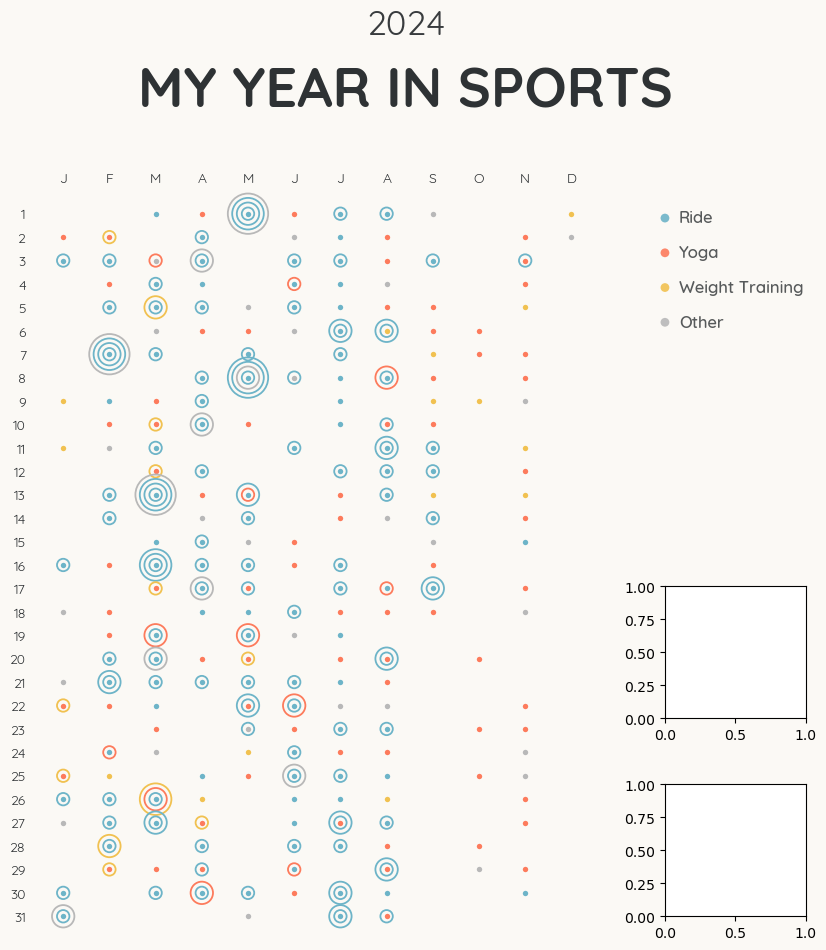

In [133]:
#setup fig-------------------------------
fig = plt.figure(figsize=(10,12))
fig.set_facecolor(colors["bg"])
gs = GridSpec(5, 4, figure=fig)
ax1 = fig.add_subplot(gs[0:4, 0:3])
ax2 = fig.add_subplot(gs[2:3:, 3:])
ax3 = fig.add_subplot(gs[3:4:, 3:])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1.set_facecolor(colors["bg"])

#plot data -----------
#circles
for row in range(len(pivot)):
    for i,label in enumerate(pivot.loc[row]["Activity Type clean"]):
        if i==0:
            ax1.scatter(x=pivot.loc[row]["Month"],
                  y=pivot.loc[row]["Day"],
                  s=15,
                  linewidth=0,
                  color=act_colormap[label],
                  clip_on=False)
        else:
            ax1.scatter(x=pivot.loc[row]["Month"],
                  y=pivot.loc[row]["Day"],
                  s=(i**1.7)*markersize,
                  color="None",
                  edgecolor=act_colormap[label],
                  linewidth=1.3,
                  clip_on=False)
            
#small multiples

            
#format axis------------------
ax1.set_xticks(np.arange(1,13,1))
ax1.set_yticks(np.arange(1,32,1))
ax1.tick_params(axis="both", length=0, labeltop=True, labelbottom=False,)
ax1.set_yticklabels(labels=ax1.get_yticks(), fontproperties=font_r, fontsize=10, color=colors["text"])
ax1.set_xticklabels(labels=month_labels, fontproperties=font_r, fontsize=10,color=colors["text"])
ax1.set_xlim(xmin=0.3,xmax=12.5)
ax1.set_ylim(ymin=0,ymax=31)
ax1.invert_yaxis()
for pos in ["top", "bottom", "left", "right"]:
    ax1.spines[pos].set_visible(False)
#ax.axis("off")

#legend--------------------------------
lg = fig.add_subplot(gs[0:1:, 3:])
kw = dict(marker='o', s=40, alpha=0.9, linewidths=0)
labels = df_filtered[["Activity Type clean", "Activity rank"]].drop_duplicates(
    ).sort_values(by="Activity rank")["Activity Type clean"].to_list()
len_act = df_filtered["Activity rank"].max().astype(int)
lg.scatter(y=np.arange(0,len_act,1), 
           x=[0]*len_act, color=[act_colormap[label] for label in labels], **kw, clip_on=False)
lg.set_xlim(xmin=0,xmax=1)
lg.set_ylim(ymin=-0.8,ymax=3)
lg.invert_yaxis()
for i, y_pos in enumerate(np.arange(0,len_act,1)):
    lg.text(0.1, y_pos, labels[i], fontsize=12, ha="left", va="center", fontproperties=font_m, color=colors["text"], alpha=0.8)
lg.axis("off")

#header and footer------------------------
plt.figtext(0.5,0.95,'My year in sports'.upper(), 
            ha="center",
            fontsize = 40, 
            color=colors["text"], 
            fontproperties=font_b)
plt.figtext(0.5,1.01,'{}'.format(year_filter), ha="center",fontsize = 25, color=colors["text"], alpha=0.95, fontproperties=font_r)
#plt.figtext(0.97,0.03,'Data: OSM, GLA London Datastore   |   Design: Lisa Hornung',ha="right", fontsize = 10, color=colors["roads"],alpha=1,fontprop

plt.show()

In [105]:
df_filtered[["Activity Type clean", "Activity rank"]].drop_duplicates().sort_values(by="Activity rank")["Activity Type clean"].to_list()

['Ride', 'Yoga', 'Weight Training', 'Other']

In [96]:
df_filtered["Activity rank"].max().astype(int)

4

In [78]:
df_filtered["Activity Type clean"].value_counts()

Activity Type clean
Ride               225
Yoga                88
Other               38
Weight Training     27
Name: count, dtype: int64

In [79]:
df_filtered["Activity Type clean"].unique()

array(['Yoga', 'Ride', 'Weight Training', 'Other'], dtype=object)

In [69]:
len_act = len(df_filtered["Activity Type clean"].unique())
np.arange(0,len_act,1)

array([0, 1, 2, 3])

In [65]:
len_act

4

In [68]:
np.arange(0,4,1)

array([0, 1, 2, 3])

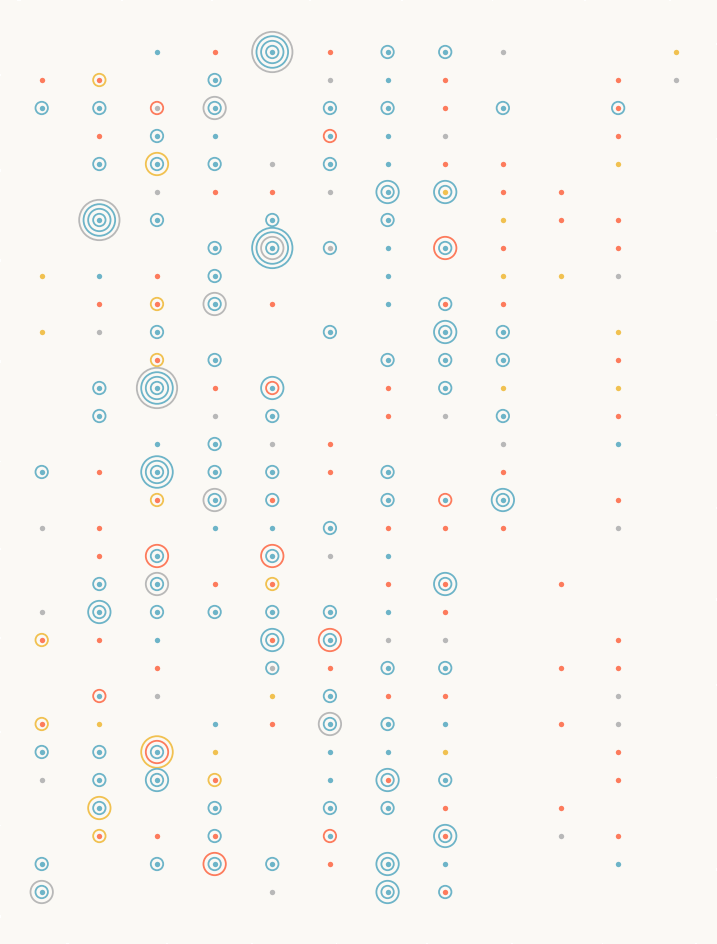

In [240]:
#setup fig-------------------------------

fig, ax = plt.subplots(figsize=(9,12))
fig.set_facecolor(colors["bg"])
ax.set_facecolor(colors["bg"])

#plot data -----------
with plt.xkcd(scale=5,length=200, randomness=5):
    for row in range(len(pivot)):
        for i,label in enumerate(pivot.loc[row]["Activity Type clean"]):
            if i==0:
                ax.scatter(x=pivot.loc[row]["Month"],
                  y=pivot.loc[row]["Day"],
                  s=15,
                  linewidth=0,
                  color=act_colormap[label])
            else:
                ax.scatter(x=pivot.loc[row]["Month"],
                  y=pivot.loc[row]["Day"],
                  s=(i**1.7)*markersize,
                  color="None",
                  edgecolor=act_colormap[label],
                  linewidth=1.3)
            
#format axis------------------
ax.invert_yaxis()
ax.axis("off")
plt.show()